## HiCAR

- Conditions: HFF on soft and stiff (2 replicates each --> 4 samples total)
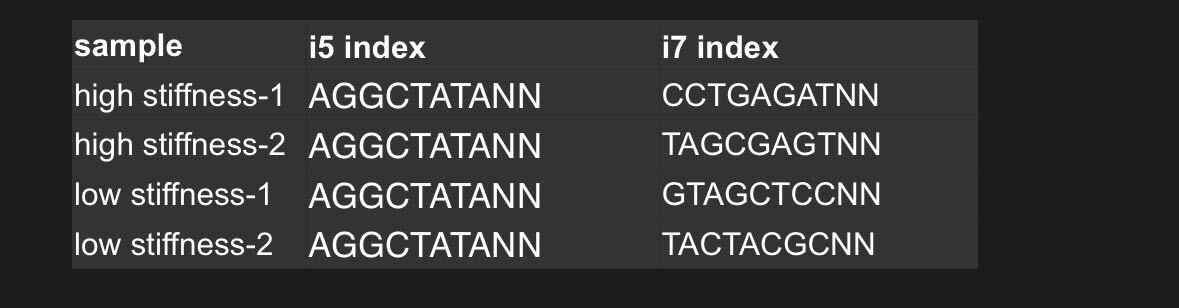

- sftp server name: dnaseq2.igsp.duke.edu
- User: key_9005 
- Password: ErlCWoTwOo9R
- Your data is under /sftp/key_9005/Key_9005/
<br><br>
Downloaded via SFTP to HARDAC

### Make directories

In [1]:
%%bash
mkdir -p /data/gersbachlab/lrb53/brianCollab/data/hicar
mkdir -p /data/gersbachlab/lrb53/brianCollab/data/hicar/logs
mkdir -p /data/gersbachlab/lrb53/brianCollab/data/hicar/sequencing
mkdir -p /data/gersbachlab/lrb53/brianCollab/data/hicar/samplesheets
mkdir -p /data/gersbachlab/lrb53/brianCollab/data/hicar/output

### Generate sample sheet for processing sequencing run

In [11]:
%%writefile /data/gersbachlab/lrb53/brianCollab/data/hicar/samplesheets/samplesheet_bcl2fastq_mismatch2.csv
[Header],,,
FileFormatVersion,2,,
RunName,hicar_test_samples,,
InstrumentPlatform,NovaSeqX,,
InstrumentType,NovaSeqX,,
,,,
[Reads],,,
Read1Cycles,100,,
Read2Cycles,100,,
Index1Cycles,10,,
Index2Cycles,16,,
,,,
[BCLConvert_Settings],,,
SoftwareVersion,3.10.4,,
NoLaneSplitting,TRUE,,
OverrideCycles,Y100;I10;I10;Y100,,
FastqCompressionFormat,gzip,,
,,,
[Data],,,
Lane,Sample_ID,index,index2
1,stiffrep1,ATCTCAGGAT,AGGCTATAGT
1,stiffrep2,ACTCGCTAAT,AGGCTATAGT
1,softrep1,GGAGCTACAT,AGGCTATAGT
1,softrep2,GCGTAGTAAT,AGGCTATAGT
2,stiffrep1,ATCTCAGGAT,AGGCTATAGT
2,stiffrep2,ACTCGCTAAT,AGGCTATAGT
2,softrep1,GGAGCTACAT,AGGCTATAGT
2,softrep2,GCGTAGTAAT,AGGCTATAGT

Writing /data/gersbachlab/lrb53/brianCollab/data/hicar/samplesheets/samplesheet_bcl2fastq_mismatch2.csv


### Demultiplex sequencing run and generate FASTQs

In [14]:
%%bash

source activate /data/gersbachlab/lrb53/envs/conda
cd /data/gersbachlab/lrb53/brianCollab/data/hicar/sequencing/Key_9005

sbatch \
    --job-name=Bcl2fastq \
    --partition all \
    --mail-user=lrb53@duke.edu \
    --mail-type=END \
    --mem 32G \
    --cpus-per-task 8 \
    -o /data/gersbachlab/lrb53/brianCollab/data/hicar/logs/run_bcl2fastq_mismatch2.log \
    <<'EOF'
#!/bin/bash

mkdir -p /data/gersbachlab/lrb53/brianCollab/data/hicar/sequencing/fastqs_mismatch2

bcl2fastq \
    --use-bases-mask=Y100n*,I10n*,I10n*,Y100n* \
    --no-lane-splitting \
    --minimum-trimmed-read-length=8 \
    --mask-short-adapter-reads=8 \
    --ignore-missing-positions \
    --ignore-missing-controls \
    --ignore-missing-filter \
    --ignore-missing-bcls \
    --barcode-mismatches 2 \
    -r 6 -w 6 \
    -R /data/gersbachlab/lrb53/brianCollab/data/hicar/sequencing/Key_9005 \
    --output-dir=/data/gersbachlab/lrb53/brianCollab/data/hicar/sequencing/fastqs_mismatch2 \
    --sample-sheet=/data/gersbachlab/lrb53/brianCollab/data/hicar/samplesheets/samplesheet_bcl2fastq_mismatch2.csv
    
EOF

Submitted batch job 30761046


### Generate sample sheet for HiCAR pipeline

In [2]:
%%writefile /data/gersbachlab/lrb53/brianCollab/data/hicar/samplesheets/samplesheet_hicar_mismatch2.csv
group,replicate,fastq_1,fastq_2,md5_1,md5_2
STIFF,1,/data/gersbachlab/lrb53/brianCollab/data/hicar/sequencing/fastqs_mismatch2/stiffrep1_S1_R1_001.fastq.gz,/data/gersbachlab/lrb53/brianCollab/data/hicar/sequencing/fastqs_mismatch2/stiffrep1_S1_R2_001.fastq.gz,,
STIFF,2,/data/gersbachlab/lrb53/brianCollab/data/hicar/sequencing/fastqs_mismatch2/stiffrep2_S2_R1_001.fastq.gz,/data/gersbachlab/lrb53/brianCollab/data/hicar/sequencing/fastqs_mismatch2/stiffrep2_S2_R2_001.fastq.gz,,
SOFT,1,/data/gersbachlab/lrb53/brianCollab/data/hicar/sequencing/fastqs_mismatch2/softrep1_S3_R1_001.fastq.gz,/data/gersbachlab/lrb53/brianCollab/data/hicar/sequencing/fastqs_mismatch2/softrep1_S3_R2_001.fastq.gz,,
SOFT,2,/data/gersbachlab/lrb53/brianCollab/data/hicar/sequencing/fastqs_mismatch2/softrep2_S4_R1_001.fastq.gz,/data/gersbachlab/lrb53/brianCollab/data/hicar/sequencing/fastqs_mismatch2/softrep2_S4_R2_001.fastq.gz,,


Overwriting /data/gersbachlab/lrb53/brianCollab/data/hicar/samplesheets/samplesheet_hicar_mismatch2.csv


### Run HiCAR pipeline using custom config and `singularity` profile

In [1]:
%%bash
mkdir /data/gersbachlab/lrb53/brianCollab/data/hicar/output_mismatch2_v3

In [2]:
%%bash

source activate /data/gersbachlab/lrb53/envs/conda_nf2

sbatch \
    --job-name=nfHicarV3 \
    --partition all \
    --mail-user=lrb53@duke.edu \
    --mail-type=END \
    --mem 256G \
    --cpus-per-task 16 \
    -o /data/gersbachlab/lrb53/brianCollab/data/hicar/logs/run_hicar_singularity_nextflow_mismatch2_v3.log \
    <<'EOF'
#!/bin/bash

cd /data/gersbachlab/lrb53/brianCollab/data/hicar/output_mismatch2_v3

source activate /data/gersbachlab/lrb53/envs/conda_nf2

nextflow run jianhong/hicar -r dev \
    --input /data/gersbachlab/lrb53/brianCollab/data/hicar/samplesheets/samplesheet_hicar_mismatch2.csv \
    --outdir /data/gersbachlab/lrb53/brianCollab/data/hicar/output_mismatch2_v3 \
    --genome GRCh38 \
    -profile singularity \
    --enzyme 'MseI' \
    --restriction_sites '^TAA' \
    -c /data/gersbachlab/lrb53/brianCollab/data/hicar/samplesheets/custom.config \
    --resample_pairs \
    --qval_thresh 0.01 \
    --skip_cutadapt TRUE \
    --skip_fastqc TRUE

EOF

Submitted batch job 30761254
